In [1]:
import pandas as pd  
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("weatherAUS.csv") 

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.dropna(inplace=True)

In [7]:
df = pd.get_dummies(df, columns = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], drop_first=True)

In [8]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
6049,2009-01-01,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,...,0,0,0,0,0,1,0,0,0,0
6050,2009-01-02,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,...,0,0,0,1,0,0,0,0,0,0
6052,2009-01-04,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,...,0,0,0,0,0,0,0,0,0,0
6053,2009-01-05,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,...,0,0,0,0,0,0,0,0,1,0
6054,2009-01-06,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df = df.drop('Date', axis=1)

In [10]:
X=df.drop('RainTomorrow', axis=1)
y= df['RainTomorrow']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print((X_train < 0).sum())


MinTemp           396
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
                 ... 
WindDir3pm_SW       0
WindDir3pm_W        0
WindDir3pm_WNW      0
WindDir3pm_WSW      0
RainToday_Yes       0
Length: 87, dtype: int64


In [13]:
gnb = GaussianNB()   
gnb.fit(X_train, y_train) 

GaussianNB()

In [14]:
y_pred = gnb.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)


Accuracy:  0.7298830202056008


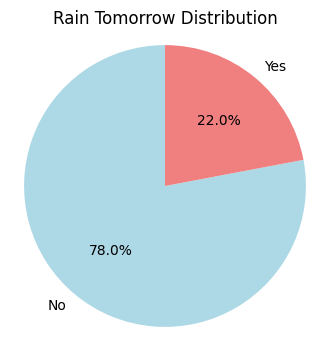

In [16]:
rain_counts = y.value_counts()

plt.figure(figsize=(4, 4))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title("Rain Tomorrow Distribution")
plt.axis('equal')  

plt.show()


In [17]:
from sklearn.metrics import precision_score, matthews_corrcoef

In [27]:
y_pr = gnb.predict(X_test)
precision = precision_score(y_test, y_pr, pos_label='Yes')
print(f'Precision: {precision:.4f}')

Precision: 0.4319


In [28]:
# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc:.4f}')

MCC: 0.3881


In [18]:
# Calculate TP, TN, FP, FN
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()


In [19]:
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print("Precision:", precision)

Precision: 0.4318566932946018


In [20]:
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) > 0 and (TP + FN) > 0 and (TN + FP) > 0 and (TN + FN) > 0 else 0
print("MCC:", mcc)

MCC: 0.388106441626879
